In [1]:
import pandas as pd
df_org = pd.read_excel('C:/Users/서현/Documents/Final_data_0813.xlsx')

In [2]:
df_org.rename(columns={'C/P' : 'CP'}, inplace = True)

In [3]:
df_org['CP'] = (df_org['CP']-1)*100

In [4]:
# 개찰 결과의 날로 오름차순으로 정렬한뒤 하나씩 shift 해서 새로운 칼럼에 추가 
df_org= df_org.sort_values(by=['BidOpenDateTime'], ascending=[True])
df_org['CorpRatio_lag'] = df_org.groupby('OrderOrgCode')['CorpRatio'].shift(1)

In [5]:
# 그룹별 평균으로 결측치 채우기 // null 값 73개가 있었는데 발주청 별 사정률로 채움 
df_org['CorpRatio_lag'] = df_org['CorpRatio'].fillna(df_org.groupby('OrderOrgCode')['CorpRatio'].transform('mean')) 

In [6]:
df_org.drop_duplicates(['G2BNumTxt'],inplace = True)

In [7]:
df_org = df_org[df_org.G2BNumTxt != 20210708492]

In [8]:
df_org = df_org[['BaseCost', 'BidLimitRatio', 'HouseHold', 'GroundArea', 'Avetem', 'Rainfall', 'Avewind', 'Avehum', "OrderOrgCode","CorpRatio_lag", "CP"]]

In [9]:
df_org

,BaseCost,BidLimitRatio,HouseHold,GroundArea,Avetem,Rainfall,Avewind,Avehum,OrderOrgCode,CorpRatio_lag,CP
6,1203430970,0.8295,417,23638.0,25.4,0.0,3.5,49.1,충청북도,100.317525,0.029252
5,1219080050,0.8045,526,34995.9,26.5,0.0,4.2,40.5,강원도,98.363508,-0.823246
4,1180791391,0.8295,478,22053.0,24.0,0.0,2.5,62.8,경상남도,101.455236,-1.045247
3,2629687871,0.7295,1310,64263.0,22.7,25.0,1.5,78.1,경상남도,100.687500,0.659751
2,5128141104,0.7295,1967,112801.0,22.7,72.0,2.1,89.6,경기도 화성시,99.522506,-0.518999
...,...,...,...,...,...,...,...,...,...,...,...
2760,2285734794,0.8045,919,39184.4,28.8,0.0,2.2,68.4,충청북도,100.126347,-0.863248
2755,2446469550,0.8045,741,42077.0,28.8,0.0,2.2,68.4,경기도 평택시,100.217725,0.202002
2761,3281306596,0.8045,706,31110.0,27.9,0.0,1.5,75.8,경기도 이천시,98.800249,-1.547249
2766,1597852604,0.8045,506,19382.4,31.2,0.0,2.0,59.8,경상북도,100.260883,0.223002


### 데이터타입변환

### 결측치처리

In [10]:
# df.isnull().sum()

### 범주형변수 라벨링하기

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_org['OrderOrgCode'] = encoder.fit_transform(df_org['OrderOrgCode'].values)

In [12]:
# df['OrderOrgCode'].unique()

### 이상치처리

In [13]:
import matplotlib.pyplot as plt

In [14]:
# df_org['SupervisionConstCost'].replace(2863409795000,123422836000,inplace=True)
# df_org['SupervisionConstCost'].replace(2182338705000,93346110000,inplace=True)
# df_org['SupervisionConstCost'].replace(2035836495000,86784270000,inplace=True)
# df_org['SupervisionConstCost'].replace(1457057745000,61311077000,inplace=True)

In [15]:
df_org['HouseHold'].replace(40, 64,inplace=True)
df_org['HouseHold'].replace(52, 124,inplace=True)

In [16]:
df_org['GroundArea'].replace(26.212, 26212,inplace=True)
df_org['GroundArea'].replace( 57.185,  57185,inplace=True)

In [17]:
# df_org = df_org[df_org.G2BNumTxt != 20210708492]

### datetime 타입 변환

In [18]:
# from datetime import date
# date.today().strftime('%Y%m%d')

# df_org['BidStartDateTime_m'] = df_org['BidStartDateTime'].dt.strftime('%m')
# df_org['BidStartDateTime_d'] = df_org['BidStartDateTime'].dt.strftime('%d')

# df_org['BidEndDateTime_m'] = df_org['BidEndDateTime'].dt.strftime('%m')
# df_org['BidEndDateTime_d'] = df_org['BidEndDateTime'].dt.strftime('%d')

# df_org['BidOpenDateTime_m'] = df_org['BidOpenDateTime'].dt.strftime('%m')
# df_org['BidOpenDateTime_d'] = df_org['BidOpenDateTime'].dt.strftime('%d')

In [19]:
# df_org['BidStartDateTime_HR'] = df_org['BidStartDateTime'].dt.hour
# df_org['BidEndDateTime_HR'] = df_org['BidEndDateTime'].dt.hour
# df_org['BidOpenDateTime_HR'] = df_org['BidOpenDateTime'].dt.hour

In [20]:
# df_org = df_org.drop(["BidStartDateTime", "BidEndDateTime", "BidOpenDateTime","BiddingDateTime"], axis =1 )

In [21]:
# df_org = df_org.astype({'BidStartDateTime_HR': object})
# df_org = df_org.astype({'BidEndDateTime_HR': object})
# df_org = df_org.astype({'BidOpenDateTime_HR': object})

### 변수삭제

In [22]:
# df = df_org[['BaseCost','BidLimitRatio','HouseHold','GroundArea','Avetem','Rainfall','Avewind','Avehum', "OrderOrgCode","CP"]]

In [23]:
df = df_org

### 다중공선성확인

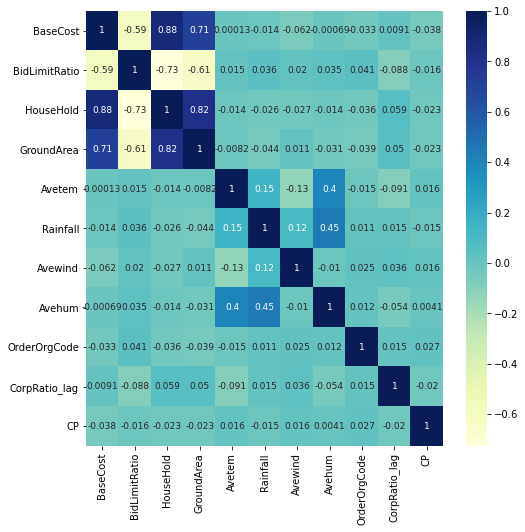

In [24]:
# 변수간의 상관관계 파악을 위한 히트맵그리기 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cbar=True, annot=True, annot_kws = {'size' : 9}, cmap='YlGnBu')
plt.show()

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [26]:
# VIF확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

model = ols('CP ~ BaseCost + BidLimitRatio + HouseHold + GroundArea + Avetem + Rainfall + Avewind + Avehum', df)

pd.DataFrame({'Column': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
                 if column != 'Intercept')

,Column,VIF
0,BaseCost,4.622534
1,BidLimitRatio,2.166397
2,HouseHold,8.600388
3,GroundArea,3.137708
4,Avetem,1.215014
5,Rainfall,1.280333
6,Avewind,1.048263
7,Avehum,1.464002


In [27]:
# VIF확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

model = ols('CP ~  BaseCost + BidLimitRatio + HouseHold + GroundArea + Avetem + Rainfall + Avewind + Avehum', df)

pd.DataFrame({'Column': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
                 if column != 'Intercept')

,Column,VIF
0,BaseCost,4.622534
1,BidLimitRatio,2.166397
2,HouseHold,8.600388
3,GroundArea,3.137708
4,Avetem,1.215014
5,Rainfall,1.280333
6,Avewind,1.048263
7,Avehum,1.464002


### 변수 Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

bc = pd.DataFrame(df, columns = ['BaseCost'])
scaler =  MinMaxScaler()
sc = scaler.fit(bc)
bc_sc = scaler.transform(bc)
df['BaseCost'] = bc_sc

br = pd.DataFrame(df, columns = ['BidLimitRatio'])
scaler =  MinMaxScaler()
sc = scaler.fit(br)
br_sc = scaler.transform(br)
df['BidLimitRatio'] = br_sc

hh = pd.DataFrame(df, columns = ['HouseHold'])
scaler =  MinMaxScaler()
sc = scaler.fit(hh)
hh_sc = scaler.transform(hh)
df['HouseHold'] = hh_sc

ga = pd.DataFrame(df, columns = ['GroundArea'])
scaler =  MinMaxScaler()
sc = scaler.fit(ga)
ga_sc = scaler.transform(ga)
df['GroundArea'] = ga_sc

at = pd.DataFrame(df, columns = ['Avetem'])
scaler =  MinMaxScaler()
sc = scaler.fit(at)
at_sc = scaler.transform(at)
df['Avetem'] = at_sc

rf = pd.DataFrame(df, columns = ['Rainfall'])
scaler =  MinMaxScaler()
sc = scaler.fit(rf)
rf_sc = scaler.transform(rf)
df['Rainfall'] = rf_sc

aw = pd.DataFrame(df, columns = ['Avewind'])
scaler =  MinMaxScaler()
sc = scaler.fit(aw)
aw_sc = scaler.transform(aw)
df['Avewind'] = aw_sc

ah = pd.DataFrame(df, columns = ['Avehum'])
scaler =  MinMaxScaler()
sc = scaler.fit(ah)
ah_sc = scaler.transform(ah)
df['Avehum'] = ah_sc

## 모델링

## RandomForestRegressor  

In [29]:
modling_data = df

In [30]:
modling_data

,BaseCost,BidLimitRatio,HouseHold,GroundArea,Avetem,Rainfall,Avewind,Avehum,OrderOrgCode,CorpRatio_lag,CP
6,0.021236,8.333333e-01,0.031761,0.031941,0.829218,0.00000,0.518519,0.340702,72,100.317525,0.029252
5,0.021558,6.250000e-01,0.040847,0.048960,0.851852,0.00000,0.648148,0.228869,0,98.363508,-0.823246
4,0.020770,8.333333e-01,0.036846,0.029566,0.800412,0.00000,0.333333,0.518856,34,101.455236,-1.045247
3,0.050612,1.418039e-10,0.106202,0.092814,0.773663,0.17301,0.148148,0.717815,34,100.687500,0.659751
2,0.102072,5.490541e-11,0.160970,0.165543,0.773663,0.49827,0.259259,0.867360,33,99.522506,-0.518999
...,...,...,...,...,...,...,...,...,...,...,...
2760,0.043528,6.250000e-01,0.073608,0.055236,0.899177,0.00000,0.277778,0.591678,72,100.126347,-0.863248
2755,0.046838,6.250000e-01,0.058770,0.059570,0.899177,0.00000,0.277778,0.591678,30,100.217725,0.202002
2761,0.064033,6.250000e-01,0.055852,0.043137,0.880658,0.00000,0.148148,0.687906,28,98.800249,-1.547249
2766,0.029360,6.250000e-01,0.039180,0.025564,0.948560,0.00000,0.240741,0.479844,35,100.260883,0.223002


In [31]:
x_data = modling_data.drop('CP', axis=1).values
print(x_data.shape)
y_data = modling_data['CP'].values
print(y_data.shape)

(2736, 10)
(2736,)


In [32]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

In [34]:
## 하이퍼 파라미터 튜닝완료 
model = RandomForestRegressor(n_estimators = 200, max_features= 6, max_depth= 10)
model.fit(x_train, y_train)

predict = model.predict(x_test)

mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)

print("R-squared:", r2)
print("MSE:", mse)

R-squared: 0.5416114128001293
MSE: 0.3749273601889239


In [ ]:
## 하이퍼파라미터 찾기 
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
estimator = RandomForestRegressor()

param_grid = {
    "n_estimators":[100,200],
     "max_depth":[10, 50, 100],
     "max_features":[6,8,10,12,14,16]
 }
#param_grid = {'n_estimators':[10,1,2,3,4,5,6,7,8,9], 'bootstrap':[True,False], 'criterion':['gini','entropy'], 'max_depth':[None,2,3,4,5,6], 'max_leaf_nodes':[None,2,3,4,5,6,7], 'min_samples_split':[2,3,4,5,6], 'min_samples_leaf':[1,2,3], 'max_features':[None,'sqrt','log2',5,6,7,8,9,10]}

grid = GridSearchCV(estimator, param_grid=param_grid) 
#grid = GridSearchCV(estimator, param_grid=param_grid, cv=3, scoring='accuracy') #디폴트로 cv=3, 분류에서 디폴트로 scoring='accuracy'

grid.fit(x_train, y_train)

print( grid.best_score_)
print( grid.best_params_)
#df = pd.DataFrame(grid.cv_results_)
#print(df)
#print(df.sort_values(by='param_n_estimators'))
#print(df.sort_values(by='param_n_estimators', ascending=0))
#print(df.sort_values(by='rank_test_score'))

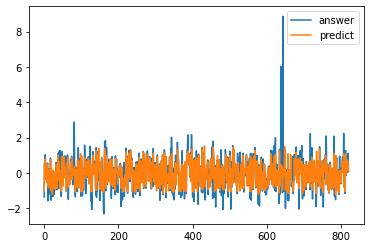

In [35]:
## 실제값과 예측값 시각화 
#test_data_label = pd.DataFrame(test_data_label.reset_index())
#del test_data_label["CP"]

plt.plot(y_test, label="answer")
plt.plot(predict, label="predict")
plt.legend()

In [36]:
colnames = modling_data.columns

In [37]:
colnames = colnames.drop('CP')

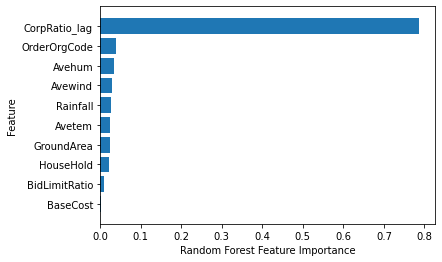

In [38]:
## 변수 중요도 시각화 -- feature_importance

def plot_feature_importance(model):
    n_features = x_train.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
    plt.yticks(np.arange(n_features), colnames)
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importance(model)

# Scikit-learn의 디폴트 랜덤 포레스트 Feature Importance는 다소 biased하다
# 랜덤 포레스트는 연속형 변수 또는 high cardinality의 범주형 변수들의 중요도를 더욱 부풀릴 가능성이 높음 

In [39]:
# ## 변수 중요도 시각화 -- Permutation Importance 이용할것 
# import eli5 
# from eli5.sklearn import PermutationImportance 

# perm = PermutationImportance(model).fit(x_test, y_test) 
# eli5.show_weights(perm, top = 80, feature_names = x_test.columns.tolist())

In [40]:
score_table = pd.DataFrame({'True':y_test.flatten(),
                            'Pred':predict})

(array([ 70., 313., 360.,  72.,   4.,   0.,   0.,   1.,   0.,   1.]),
 array([-2.32599787, -1.20678661, -0.08757535,  1.03163591,  2.15084717,
         3.27005843,  4.38926969,  5.50848095,  6.62769221,  7.74690347,
         8.86611473]),
 <a list of 10 Patch objects>)

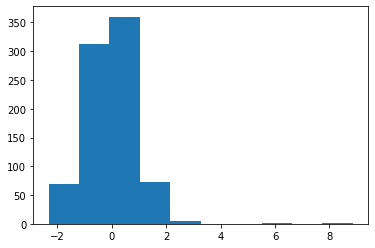

In [41]:
plt.hist(y_test)

In [42]:
score_table

,True,Pred
0,-1.368748,-1.051192
1,0.570253,0.460791
2,-0.109749,-0.370665
3,1.019253,0.788829
4,-0.121749,-0.018934
...,...,...
816,0.868252,0.726734
817,0.024252,0.141572
818,0.933251,0.645681
819,1.099752,0.080510


---

#### k-fold 사용 - 랜덤포레스트  -> 미처리

In [43]:
# pd.DataFrame(data).to_numpy()

In [44]:
# x = modling_data.drop('CP', axis=1).values
# print(x.shape)
# y = modling_data['CP'].values
# print(y.shape)

In [45]:
# model = RandomForestRegressor(n_estimators = 10, random_state = 15)

In [46]:
# kfold = KFold(n_splits=15,  shuffle=True, random_state=7)

In [47]:
# accuracy_list = []
# n_iter =0

# for train_index, test_index in kfold.split(x):  # data를 위에서 지정한 kfold 숫자로 분할
#     x_train, x_test = x[train_index], x[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     model.fit(x_train, y_train)
#     pred = model.predict(x_test)
#     n_iter += 1

#     mse = np.sqrt(mean_squared_error(pred, y_test))
#     print('평균제곱근오차', mse)